Redes neuronales convolucionales con Keras

In [20]:
# Importamos las librerias a usar
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Conv2D # para agregar capas convolucionales
from keras.layers import MaxPooling2D # para agregar capas de pooling
from keras.layers import Flatten # para aplanar los datos para las capas totalmente conectadas
from keras.datasets import mnist
import matplotlib.pyplot as plt


## Acerca del conjunto de datos `MNIST`

La base de datos MNIST , abreviatura de base de datos del Instituto Nacional Modificado de Estándares y Tecnología, es una gran base de datos de dígitos escritos a mano que se usa comúnmente para entrenar varios sistemas de procesamiento de imágenes.

La base de datos MNIST contiene 60.000 imágenes de entrenamiento y 10.000 imágenes de prueba de dígitos escritos por estudiantes de secundaria y empleados de la Oficina del Censo de Estados Unidos. [Dataset source](https://keras.io/api/datasets/mnist/)

In [21]:
#  Leemos la Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


En el conjunto de entrenamiento, hay un total de 60,000 imágenes, cada una con dimensiones de 28 píxeles por 28 píxeles. Por otro lado, las etiquetas (representadas por 'y') corresponden a los valores que identifican cada imagen en el conjunto de datos, es decir, los dígitos que representan, Con la siguiente gráfica, podemos visualizar cómo está compuesto nuestro conjunto de datos con las imágenes y sus respectivas etiquetas. 

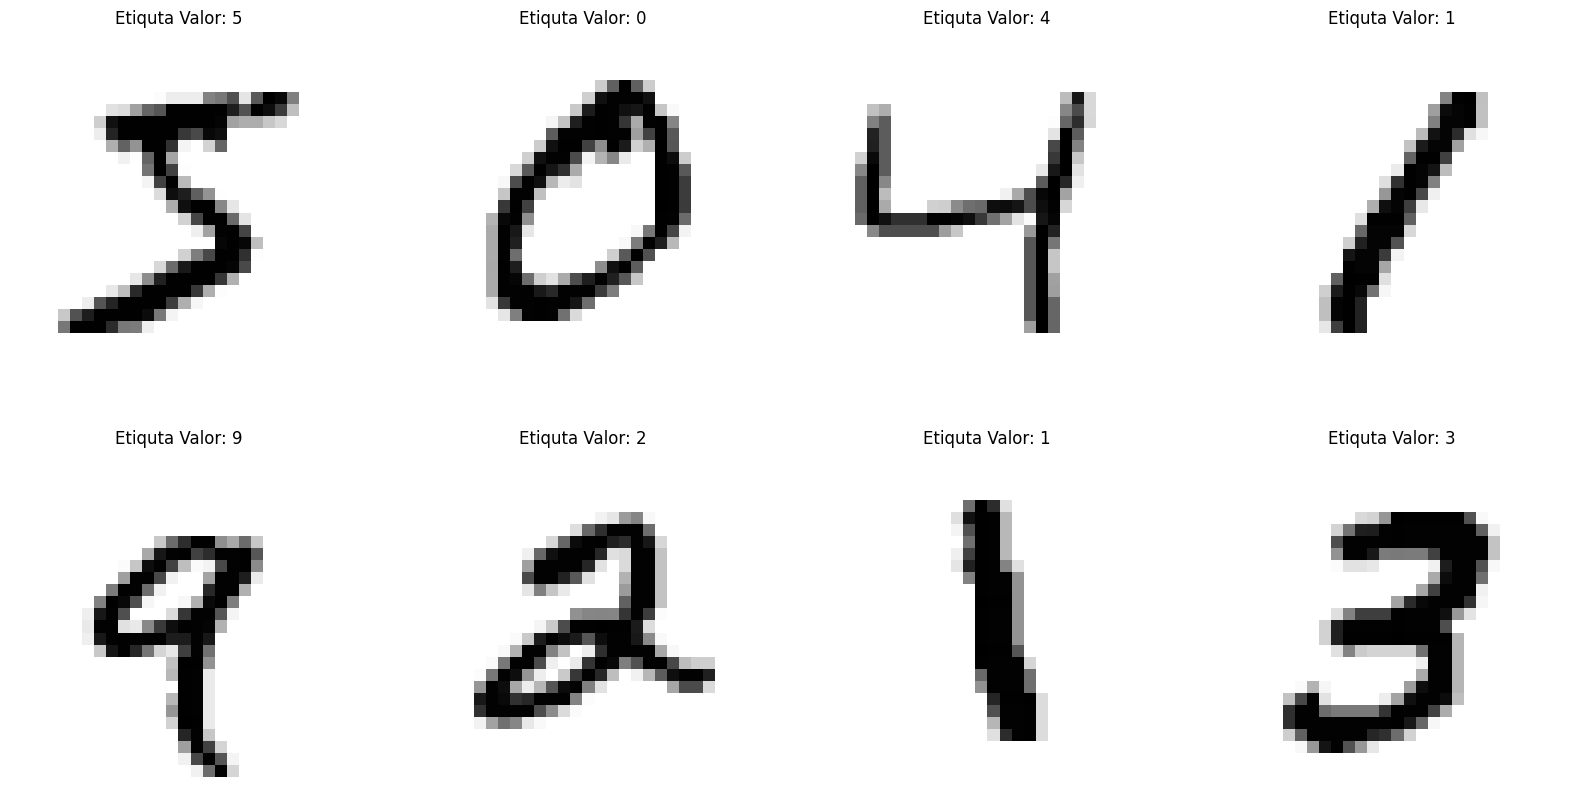

In [22]:
# Crea una figura con 4 subfiguras
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Itera sobre las subfiguras y muestra cada imagen con su etiqueta
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='binary')
    digito = y_train[i]
    ax.set_title(f"Etiquta Valor: {digito}")     
    ax.axis('off') 

plt.show()

Se realiza un reshape() para adecuar los datos de las imágenes al formato esperado por la red neuronal convolucional. 

In [23]:
# Reorganiza para que sea [muestras][píxeles = [ancho][alto]][Canal(color)]"
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

Normalicemos los valores de píxeles para que estén entre 0 y 1.

In [24]:
# Normaliza train data
X_train = X_train/255 
# Normaliza test data
X_test = X_test/255 

Para poder iniciar la construcción de nuestro modelo debemos convertimos nuestra variable objetivo en categorías

In [25]:
# conviertamos la variable de destino en categorías binarias.
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)
# Número de categorias
num_categ = y_train.shape[1] 

## Construir modelo convulucional

In [27]:
# Creamos la función que crea nuestro modelo
def convolutional_model():
    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))        
    model.add(Dense(num_categ, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

Ahora, llamemos a la función para crear nuestra nueva red neuronal convolucional y luego entrenémosla y evalúémosla.

In [32]:
# Construimos el modelo
model = convolutional_model()
# Entrenamos el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Evaluar modelo
score = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: {} y error: {}'.format(score[1], 1-score[1] ))


Epoch 1/10
300/300 - 6s - 21ms/step - accuracy: 0.9143 - loss: 0.3110 - val_accuracy: 0.9679 - val_loss: 0.1135
Epoch 2/10
300/300 - 4s - 15ms/step - accuracy: 0.9714 - loss: 0.0986 - val_accuracy: 0.9772 - val_loss: 0.0713
Epoch 3/10
300/300 - 4s - 14ms/step - accuracy: 0.9797 - loss: 0.0686 - val_accuracy: 0.9812 - val_loss: 0.0577
Epoch 4/10
300/300 - 4s - 15ms/step - accuracy: 0.9843 - loss: 0.0526 - val_accuracy: 0.9818 - val_loss: 0.0596
Epoch 5/10
300/300 - 4s - 14ms/step - accuracy: 0.9875 - loss: 0.0429 - val_accuracy: 0.9850 - val_loss: 0.0431
Epoch 6/10
300/300 - 4s - 15ms/step - accuracy: 0.9896 - loss: 0.0351 - val_accuracy: 0.9849 - val_loss: 0.0439
Epoch 7/10
300/300 - 4s - 15ms/step - accuracy: 0.9909 - loss: 0.0308 - val_accuracy: 0.9872 - val_loss: 0.0392
Epoch 8/10
300/300 - 4s - 14ms/step - accuracy: 0.9924 - loss: 0.0252 - val_accuracy: 0.9875 - val_loss: 0.0394
Epoch 9/10
300/300 - 4s - 14ms/step - accuracy: 0.9937 - loss: 0.0214 - val_accuracy: 0.9868 - val_loss:

Después de entrenar el modelo durante 10 épocas, se logró una precisión del 99.46% en los datos de entrenamiento y del 98.90% en los datos de validación. Estos resultados destacan la eficacia de las CNN para tareas de clasificación de imágenes y su capacidad para lograr altos niveles de precisión en problemas de reconocimiento de dígitos escritos a mano.